In [40]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import random
from sklearn.cluster import KMeans

In [127]:
def graficas(Im1, Im2, k):
    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 6), sharex=True, sharey=True)
    ax1 = axes.ravel()

    ax1[0].imshow(Im1, cmap=plt.cm.brg)
    #ax1[0].set_title('Original')
    ax1[1].imshow(Im2, cmap=plt.cm.brg)
    #ax1[1].set_title('Img K-means  [k = '+str(k)+']')
    
    for a in ax1:
        a.set_axis_off()

    fig.tight_layout()
    plt.show()

def graficas2(Im1, Im2, k):
    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 6), sharex=True, sharey=True)
    ax1 = axes.ravel()

    ax1[0].imshow(Im1, cmap=plt.cm.brg)
    #ax1[0].set_title('Original')
    ax1[1].imshow(Im2, cmap=plt.cm.gray)
    #ax1[1].set_title('Img K-means  [k = '+str(k)+']')
    
    for a in ax1:
        a.set_axis_off()

    fig.tight_layout()
    plt.show()

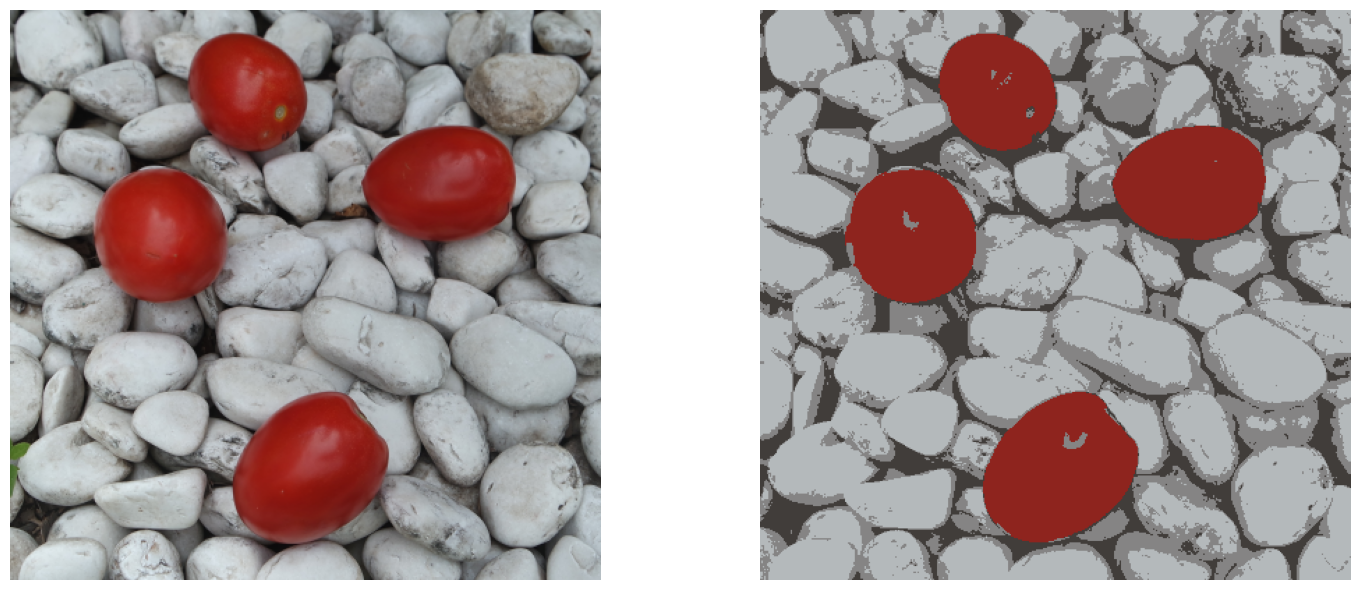

In [128]:
image = cv2.imread('Jit1.jpg')

imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

scale_percent = 15# percent of original size
width = int(imageRGB.shape[1] * scale_percent / 100)
height = int(imageRGB.shape[0] * scale_percent / 100)
dim = (width, height)  
# using the openCV resize function to appropriately resize the image
imageRGB = cv2.resize(imageRGB, dim, interpolation = cv2.INTER_AREA)

pixels_vals = imageRGB.reshape((-1,3))

pixels_vals = np.float32(pixels_vals)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.085)

K = 4

retval, labels, centers = cv2.kmeans(pixels_vals,K,None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)

segmented_data = centers[labels.flatten()]

segmented_image = segmented_data.reshape((imageRGB.shape))

imFiLt = cv2.cvtColor(segmented_image,cv2.COLOR_BGR2RGB)

graficas(imageRGB,segmented_image,K)



## Obtener la imagen con solo los tomates

Valores tomtate = [142,36,30]

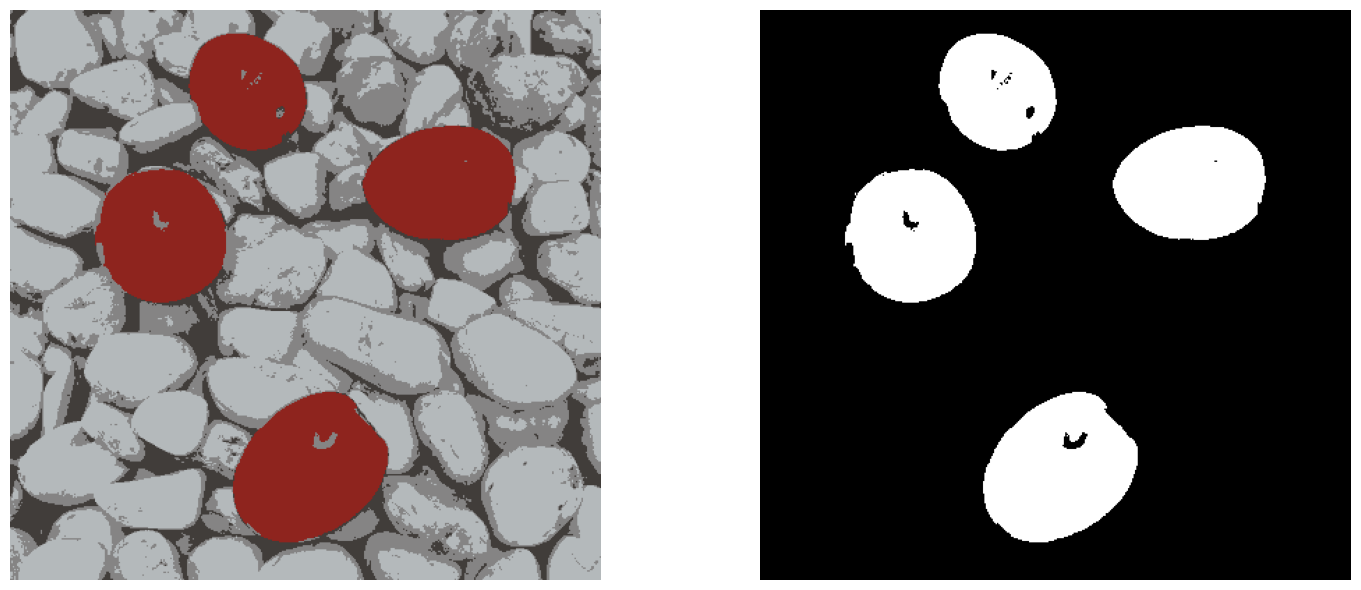

In [43]:
rows = segmented_image.shape[0]
cols = segmented_image.shape[1]

tomatoes = np.zeros((rows,cols),np.uint8)

for i in range(rows):
    for j in range(cols):

        blue = segmented_image[i,j,2]
        green = segmented_image[i,j,1]
        red = segmented_image[i,j,0]

        #Si se pega al grupo 1
        if [red,green,blue] == [142,36,30]:
            tomatoes[i,j] = 255

graficas2(segmented_image,tomatoes,4)

## Procesar imagen de los tomates

In [44]:
imagen = tomatoes

In [45]:
positions_x = []
positions_y = []

rows = imagen.shape[0]
cols = imagen.shape[1]

#Se encuentran los pixeles blancos
for i in range(rows): #filas
    for j in range(cols): #columnas

        value = imagen[i,j]

        if value == 255:

            positions_x.append(j)
            positions_y.append(i)

In [46]:
pos_df = pd.DataFrame({"x":positions_x,"y":positions_y})

In [47]:
print(pos_df)

         x    y
0      155   17
1      156   17
2      157   17
3      158   17
4      159   17
...    ...  ...
27878  202  381
27879  203  381
27880  204  381
27881  205  381
27882  206  381

[27883 rows x 2 columns]


# Encontrar 4 tomates

In [48]:
k=4

In [62]:
random.seed(15)

white_centroids = np.zeros((k,2))

for i in range(k):

    pixel = pos_df.iloc[random.randint(1,len(pos_df.axes[0]))]
    x=pixel['y']
    y=pixel['x']

    # x = random.randint(0,len(positions_x))
    # y = random.randint(0,rows)

    white_centroids[i]=[x,y]

print(white_centroids)

white_centroids = pd.DataFrame({"x":white_centroids[:,0],"y":white_centroids[:,1]})

white_centroids

# white_centroids =get_random_centroids(pos_df, k)
# white_centroids

[[105. 268.]
 [ 27. 139.]
 [175. 125.]
 [335. 187.]]


,x,y
0,105.0,268.0
1,27.0,139.0
2,175.0,125.0
3,335.0,187.0


Los valores optimos de centroides inciales para poder segmenetar correactemente
la imagen son:

| | x | y |
|------|-----|----|
| 0 | 105.0 | 268.0 |
| 1 | 27.0 | 139.0 |
| 2 | 175.0 | 125.0 |
| 3 | 335.0 | 187.0 |

## Parte scikit learn

In [63]:
# datos = np.array(pos_df[["x","y"]])
# # y = np.array(dataframe['categoria'])
# # X.shape

# # X = np.array(dataframe[["op","ex","ag"]])
# # y = np.array(dataframe['categoria'])
# # X.shape
# kmeans = KMeans(n_clusters=4).fit(datos)
# centroids = kmeans.cluster_centers_
# print(centroids)

# white_centroids = pd.DataFrame({"x":centroids[:,0],"y":centroids[:,1]})
# print(white_centroids)

In [64]:
# XD=pos_df
# i=1
# #Se realiza un recorrido entre los diferentes centroides
# for index1,row_c in white_centroids.iterrows():
#     ED=[]
#     # ED es una lista con todas las distancias entre cada punto y los centroides
#     for index2,row_d in XD.iterrows():
#         #calculate distance between current point and centroid
#         d1=(row_c["x"]-row_d["x"])**2
#         d2=(row_c["y"]-row_d["y"])**2
#         d=np.sqrt(d1+d2)
#         #Se agrega la distancias
#         ED.append(d)
        
#     #agrega la distancia que tiene con cada cluster
#     pos_df[i]=ED
#     i=i+1
#     #Se agrega cada columand de las distancias

# C=[]
# #print("Obteniendo centroides")

# #for index,row in tqdm(img_df.iterrows()):
# for index,row in pos_df.iterrows():
#     #get distance from centroid of current data point
#     min_dist=row[1]
#     pos=1
    
#     #loop to locate the closest centroid to current point
#     for i in range(k):
#         #if current distance is greater than that of other centroids
#         if row[i+1] < min_dist:
#             #the smaller distanc becomes the minimum distance 
#             min_dist = row[i+1]
#             pos=i+1
            
#     C.append(pos)
    

# pos_df["Cluster"]=C

In [65]:
# print(pos_df)

In [66]:
diff = 1
j=0

while(abs(diff) > 0.5):          # while(abs(diff)>0.05):
    XD=pos_df
    i=1
    
    #Se realiza un recorrido entre los diferentes centroides
    for index1,row_c in white_centroids.iterrows():
        ED=[]
        # ED es una lista con todas las distancias entre cada punto y los centroides
        for index2,row_d in XD.iterrows():
            #calculate distance between current point and centroid
            d1=(row_c["x"]-row_d["x"])**2
            d2=(row_c["y"]-row_d["y"])**2
            d=np.sqrt(d1+d2)
            #Se agrega la distancias
            ED.append(d)
            
        #agrega la distancia que tiene con cada cluster
        pos_df[i]=ED
        i=i+1
        #Se agrega cada columand de las distancias

    C=[]
    #print("Obteniendo centroides")
    
    #for index,row in tqdm(img_df.iterrows()):
    for index,row in pos_df.iterrows():
        #get distance from centroid of current data point
        min_dist=row[1]
        pos=1
        
        #loop to locate the closest centroid to current point
        for i in range(k):
            #if current distance is greater than that of other centroids
            if row[i+1] < min_dist:
                #the smaller distanc becomes the minimum distance 
                min_dist = row[i+1]
                pos=i+1
                
        C.append(pos)
        

    pos_df["Cluster"]=C

    centroids_new = pos_df.groupby(["Cluster"]).mean()[["x","y"]]
    
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (centroids_new["x"] - white_centroids["x"]).sum() + (centroids_new["y"] - white_centroids["y"]).sum()
        print("Diferencia entre centroides (actual - anterior):", diff.sum())

        print(centroids_new)
        print(white_centroids)

    print(j)

    white_centroids = pos_df.groupby(["Cluster"]).mean()[["x","y"]]

1
Diferencia entre centroides (actual - anterior): 18.89244304076287
                  x           y
Cluster                        
1        214.024730  329.433544
2        105.622946  164.025284
3        166.162857   65.972773
4        309.564683  123.828503
                  x           y
Cluster                        
1        196.718299  314.536904
2         84.332942  155.810811
3        159.832133   95.974569
4        306.879051  145.658169
1
Diferencia entre centroides (actual - anterior): -4.461395252852711
                  x           y
Cluster                        
1        214.024730  329.433544
2        108.429332  161.541163
3        169.546717   57.805253
4        309.564683  123.828503
                  x           y
Cluster                        
1        214.024730  329.433544
2        105.622946  164.025284
3        166.162857   65.972773
4        309.564683  123.828503
1
Diferencia entre centroides (actual - anterior): 0.0
                  x           y
Cluste

In [67]:
# print(white_centroids)
# print(pos_df)

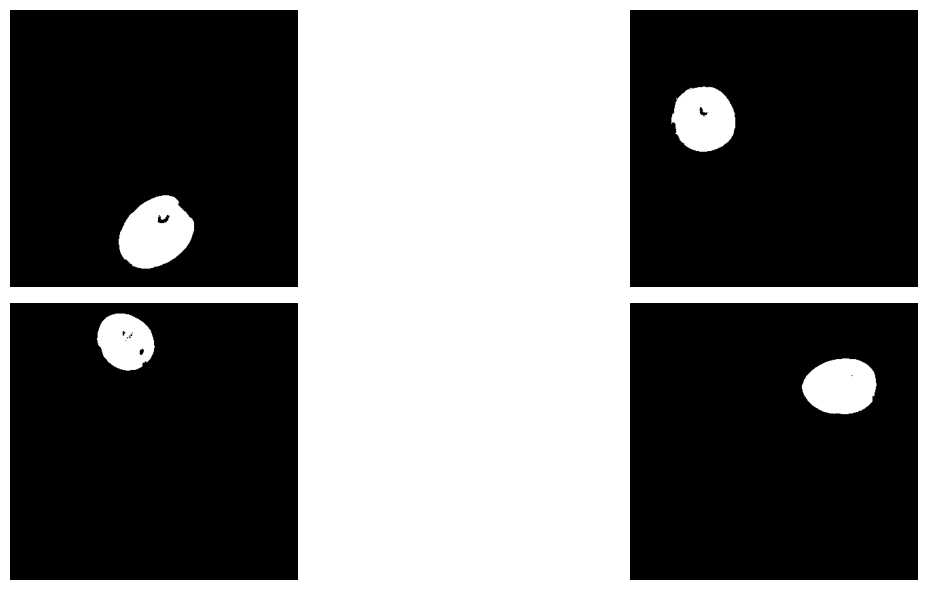

In [68]:
rows = imagen.shape[0]
cols = imagen.shape[1]

o1 = np.zeros((rows,cols),np.uint8)
o2 = np.zeros((rows,cols),np.uint8)
o3 = np.zeros((rows,cols),np.uint8)
o4 = np.zeros((rows,cols),np.uint8)

for index, row in pos_df.iterrows():

    cluster = row["Cluster"]

    x = row["x"]
    y = row['y']
    if cluster == 1:
      o1[int(y),int(x)] = 255
    elif cluster == 2:
      o2[int(y),int(x)] = 255
    elif cluster == 3:
      o3[int(y),int(x)] = 255
    elif cluster == 4:
      o4[int(y),int(x)] = 255

    
  
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16, 6), sharex=True, sharey=True)
ax1 = axes.ravel()

ax1[0].imshow(o1, cmap=plt.cm.gray)
ax1[1].imshow(o2, cmap=plt.cm.gray)
ax1[2].imshow(o3, cmap=plt.cm.gray)
ax1[3].imshow(o4, cmap=plt.cm.gray)
for a in ax1:
    a.set_axis_off()

fig.tight_layout()
plt.show()

# Tomate 2

In [71]:
#La imagen cuatro corresponde al tomate 4
t2 = o4

t2_x = []
t2_y = []

####
rows_t2 = t2.shape[0]
cols_t2 = t2.shape[1]

for i in range(rows_t2):
  for j in range(cols_t2):

    value = t2[i,j]

    if value == 255:
      t2_x.append(j)
      t2_y.append(i)


pos_t2 = pd.DataFrame({"x":t2_x,"y":t2_y})

# print(pos_t2)

## Encontrar el valor máximo de x y el minimo

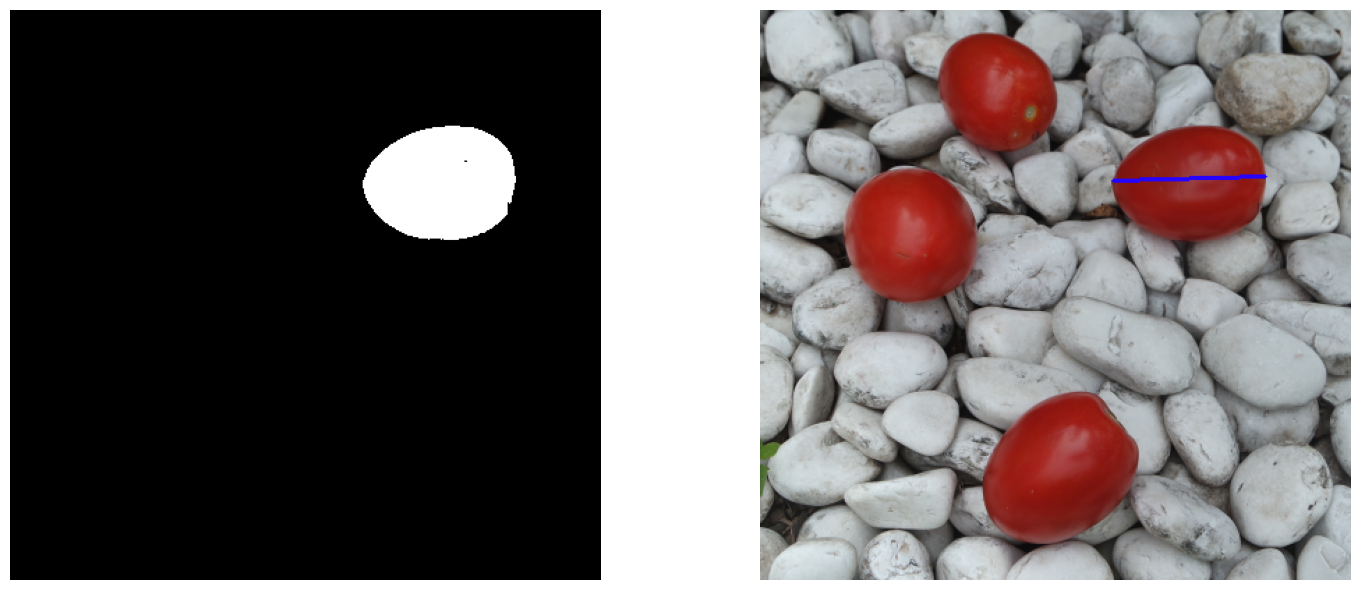

In [137]:
min_x = min(t2_x) #Encuentra el valor minimo de x
i_minx = t2_x.index(min_x)
min_y = t2_y[i_minx] 
#Encontrar max

max_x = max(t2_x) #Encuentra el valor minimo de x
i_maxx = t2_x.index(max_x)
max_y = t2_y[i_maxx]

p1_t2 = [min_x,min_y]
p2_t2 = [max_x,max_y]


copia3 = imageRGB.copy()
cv2.line(copia3,(min_x,min_y),(max_x,max_y),(37, 3, 252),2)

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 6), sharex=True, sharey=True)
ax1 = axes.ravel()

ax1[0].imshow(t2, cmap=plt.cm.gray)
ax1[1].imshow(copia3, cmap=plt.cm.gray)
for a in ax1:
    a.set_axis_off()

fig.tight_layout()
plt.show()

## Tomate 4

In [73]:
t4 = o1

t4_x = []
t4_y = []

####
rows_t4 = t4.shape[0]
cols_t4 = t4.shape[1]

for i in range(rows_t4):
  for j in range(cols_t4):

    value = t4[i,j]

    if value == 255:
      t4_x.append(j)
      t4_y.append(i)


In [125]:
## Encontrar puntos mas pegados a la izquierda y hacia abajo
min_x = min(t4_x) #Encuentra el valor minimo de x
i_minx = t4_x.index(min_x)
min_y = t4_y[i_minx] 
#Encontrar max

max_y = max(t4_y) #Encuentra el valor mas bajo de y
i_maxy = t4_y.index(max_y)
max_x = t4_y[i_maxy]

p1_t4_x = min(min_x,max_x)
p1_t4_y = max(min_y,max_y)

p1_t4 = [p1_t4_x,p1_t4_y]


print(p1_t4)

## Encontrar puntos mas pegados a la derecha y arriba
x_1 = max(t4_x) #Encuentra el valor minimo de x
i_1 = t4_x.index(x_1)
y_1= t4_y[i_1] 
#Encontrar max

y_2 = min(t4_y) #Encuentra el valor mas arriba de y
i_2 = t4_y.index(y_2)
x_2 = t4_y[i_2]

p2_t4_x = max(x_1,x_2)
p2_t4_y = min(y_1,y_2)

p2_t4 = [p2_t4_x,p2_t4_y]


print(p2_t4)


# #Pintar las lineas
# copia2 = imageRGB
# cv2.line(copia2,(p1_t4[0],p1_t4[1]),(p2_t4[0],p2_t4[1]),(255,255,255),3)
 
# fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 6), sharex=True, sharey=True)
# ax1 = axes.ravel()

# ax1[0].imshow(t4, cmap=plt.cm.gray)
# ax1[1].imshow(copia2, cmap=plt.cm.gray)
# for a in ax1:
#     a.set_axis_off()

# fig.tight_layout()
# plt.show()

[160, 381]
[274, 274]


In [105]:
m =(p1_t4[1]-p2_t4[1])/(p1_t4[0]-p2_t4[0])

print(m)

X = [x for x in range(min(p1_t4[0],p2_t4[0]),max(p1_t4[0],p2_t4[0])+1)]

Y = map(lambda x: round((m*x -(p1_t4[0]*m) + p1_t4[1])),X)
Y = list(Y)

print(X)
print(Y)

print(t4[360,172])



-0.9385964912280702
[160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274]
[381, 380, 379, 378, 377, 376, 375, 374, 373, 373, 372, 371, 370, 369, 368, 367, 366, 365, 364, 363, 362, 361, 360, 359, 358, 358, 357, 356, 355, 354, 353, 352, 351, 350, 349, 348, 347, 346, 345, 344, 343, 343, 342, 341, 340, 339, 338, 337, 336, 335, 334, 333, 332, 331, 330, 329, 328, 328, 327, 326, 325, 324, 323, 322, 321, 320, 319, 318, 317, 316, 315, 314, 313, 312, 312, 311, 310, 309, 308, 307, 306

[173, 369]
[253, 294]


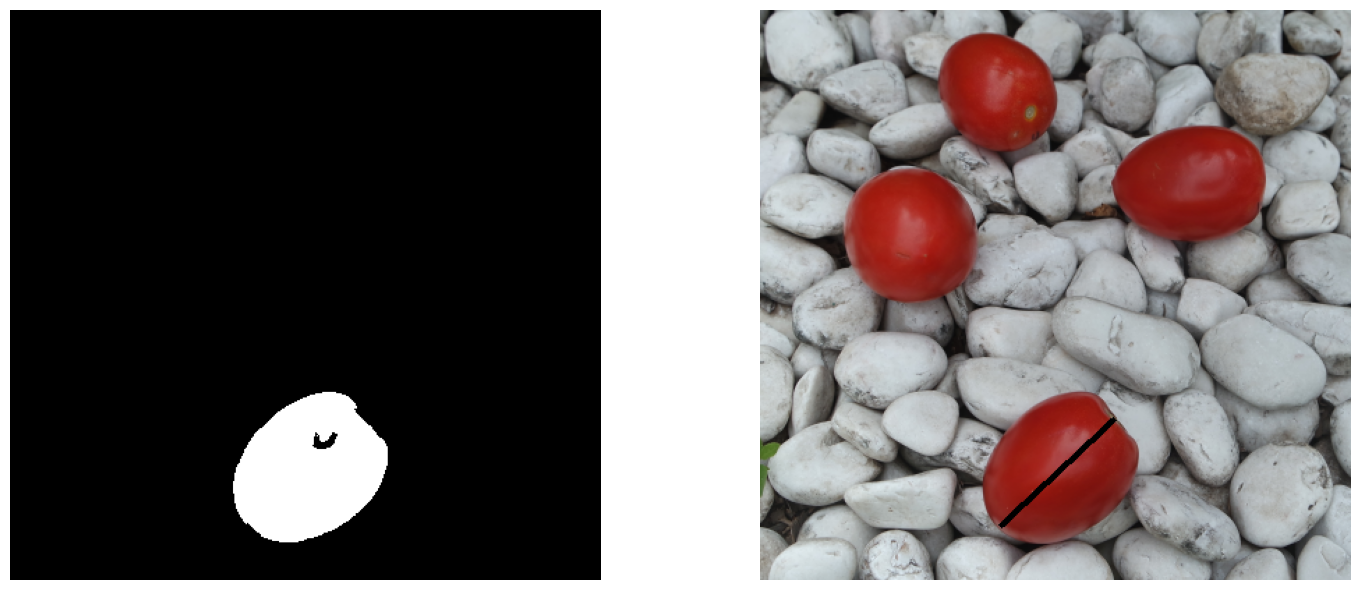

In [129]:
contador = 0

punto_inicial = []

punto_final = []

for i in range(len(X)):
    #Encontrar el primer cruce
    #print(i)
    x = X[i]
    y = Y[i]

    value = t4[y,x]


    #print(value)

    # if value==255:
    #     print(value)
        
    if contador==0 and value==255:
#     x = X[i]
#     y = Y[i]
        punto_inicial.append(x)
        punto_inicial.append(y)
        contador =1
    if contador==1 and value==0:
        punto_final.append(X[i-1])
        punto_final.append(Y[i-1])
        contador =1
        break
    #     value = t4[y,x]

    #     #Inicia la forma
    #     if value==255:
        
    #         punto_inicial.append(x)
    #         punto_inicial.append(y)
    #         contador ==1

    # #Encontrar el primer cruce
    # elif contador==1:

    #     x = X[i]
    #     y = Y[i]

    #     value = t4[y,x]

    #     #Inicia la forma
    #     if value==0:

    #         if contador==0:
    #             punto_final.append(X[i-1])
    #             punto_final.append(y[i-1])

    # print(contador)
#Pintar la linea
#print(contador)


print(punto_inicial)
print(punto_final)


copia4 = imageRGB.copy()
cv2.line(copia4,(punto_inicial[0],punto_inicial[1]),(punto_final[0],punto_final[1]),(0,0,0),3)
 
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 6), sharex=True, sharey=True)
ax1 = axes.ravel()

ax1[0].imshow(t4, cmap=plt.cm.gray)
ax1[1].imshow(copia4, cmap=plt.cm.gray)
for a in ax1:
    a.set_axis_off()

fig.tight_layout()
plt.show()

## Resultado final

### Datos tomate 2

In [139]:
print("Resultados de acuerdo a coordeanas (X,Y)")

print(f"Punto inicial:({min_x},{min_y})")
print(f"Punto final: ({max_x},{max_y})")

distancia = math.dist([min_x,min_y],[max_x,max_y])
print(f"Distancia: {distancia} pixeles")


Resultados de acuerdo a coordeanas (X,Y) 
Punto inicial:(253,122)
Punto final: (362,119)
Distancia: 109.04127658827184 pixeles


### Datos tomate 4

In [140]:
print("Resultados de acuerdo a coordeanas (X,Y) ")
print(f"Punto inicial:({punto_inicial[0]},{punto_inicial[1]})")
print(f"Punto final: ({punto_final[0]},{punto_final[1]})")

distancia = math.dist([punto_inicial[0],punto_inicial[1]],[punto_final[0],punto_final[1]])
print(f"Distancia: {distancia} pixeles")

Resultados de acuerdo a coordeanas (X,Y) 
Punto inicial:(173,369)
Punto final: (253,294)
Distancia: 109.65856099730654 pixeles


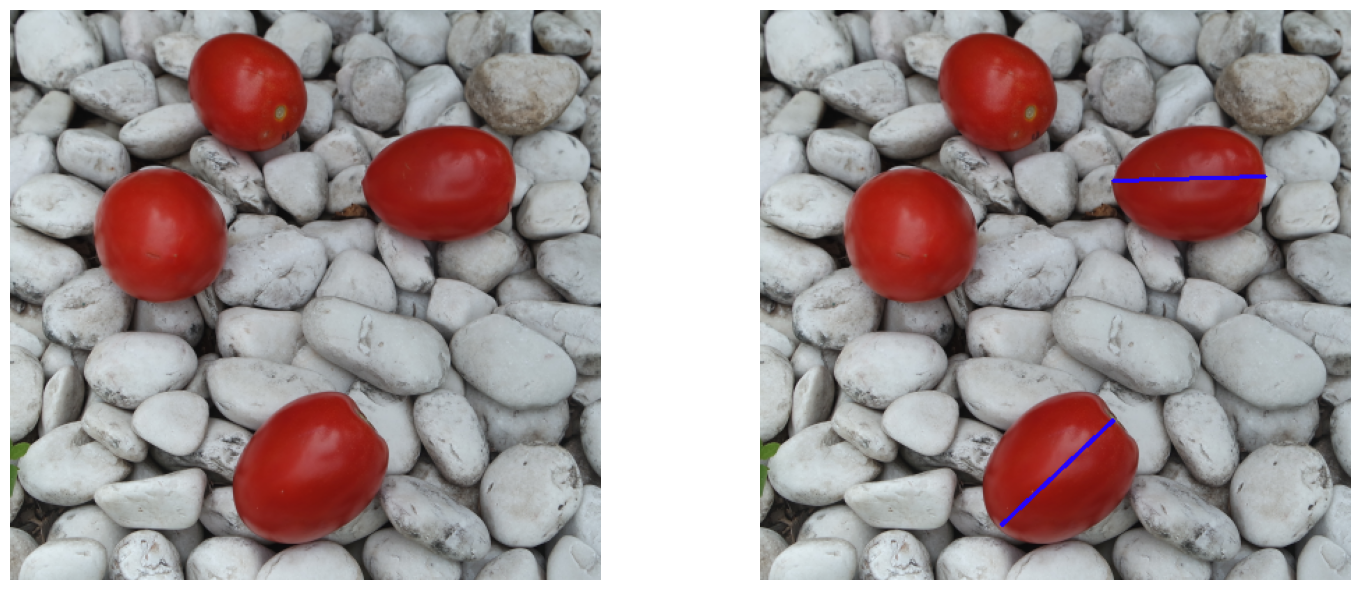

In [138]:
final = imageRGB.copy()
#Linea 1
# cv2.line(final,(min_x,min_y),(max_x,max_y),(255,255,255),2)
cv2.line(final,(punto_inicial[0],punto_inicial[1]),(punto_final[0],punto_final[1]),(37, 3, 252),2)
 

cv2.line(final,(min_x,min_y),(max_x,max_y),(37, 3, 252),2)
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 6), sharex=True, sharey=True)
ax1 = axes.ravel()

ax1[0].imshow(imageRGB, cmap=plt.cm.gray)
ax1[1].imshow(final, cmap=plt.cm.gray)
for a in ax1:
    a.set_axis_off()

fig.tight_layout()
plt.show()